In [1]:
import pandas as pd
import numpy as np

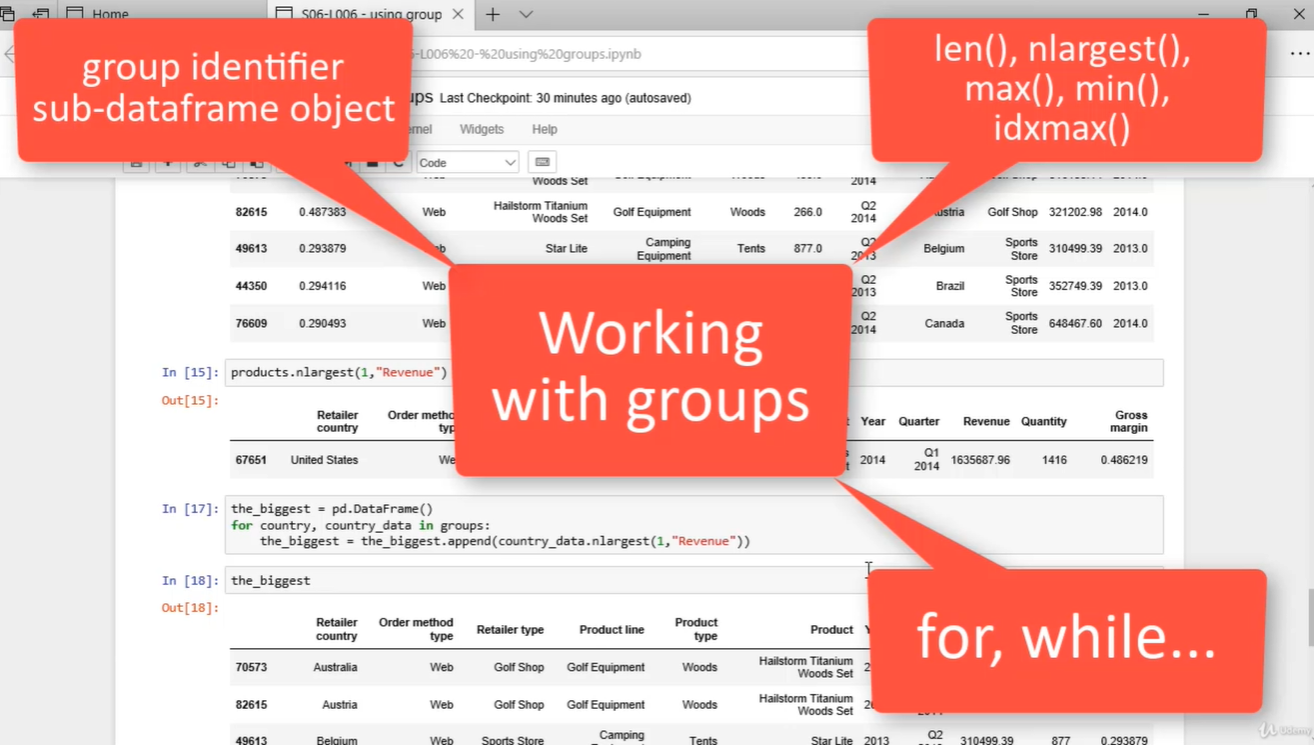

In [2]:
products = pd.read_csv('/content/WA_Sales_Products_2012-14.csv')
products.head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
0,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Deluxe Cook Set,2012.0,Q1 2012,59628.66,489.0,0.347548
1,United States,Fax,Outdoors Shop,Camping Equipment,Cooking Gear,TrailChef Double Flame,2012.0,Q1 2012,35950.32,252.0,0.474274
2,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Dome,2012.0,Q1 2012,89940.48,147.0,0.352772
3,United States,Fax,Outdoors Shop,Camping Equipment,Tents,Star Gazer 2,2012.0,Q1 2012,165883.41,303.0,0.282938
4,United States,Fax,Outdoors Shop,Camping Equipment,Sleeping Bags,Hibernator Lite,2012.0,Q1 2012,119822.20,1415.0,0.291450


In [6]:
groups = products.groupby(by='Retailer country')
groups

In [7]:
for country in groups:
  print(country[0])

Australia
Austria
Belgium
Brazil
Canada
China
Denmark
Finland
France
Germany
Italy
Japan
Korea
Mexico
Netherlands
Singapore
Spain
Sweden
Switzerland
United Kingdom
United States


In [11]:
country_names = []
for country in groups:
  country_names.append(country[0])

country_names

['Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Canada',
 'China',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Italy',
 'Japan',
 'Korea',
 'Mexico',
 'Netherlands',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom',
 'United States']

In [15]:
for country in groups:
  print(country[1])

      Retailer country Order method type  ... Quantity Gross margin
3735         Australia         Telephone  ...     53.0     0.509564
3736         Australia         Telephone  ...     70.0     0.507874
3737         Australia         Telephone  ...    158.0     0.284152
3738         Australia         Telephone  ...    255.0     0.413692
3739         Australia         Telephone  ...     46.0     0.437513
...                ...               ...  ...      ...          ...
46217        Australia       Sales visit  ...    127.0     0.299114
46218        Australia       Sales visit  ...    229.0     0.308627
46219        Australia       Sales visit  ...     97.0     0.321989
46220        Australia       Sales visit  ...    600.0     0.252632
46221        Australia       Sales visit  ...    398.0     0.291174

[2086 rows x 11 columns]
      Retailer country Order method type  ... Quantity Gross margin
7588           Austria         Telephone  ...    137.0     0.373695
7589           Austria

In [16]:
for country in groups:
  print(country[0],len(country[1]))

Australia 2086
Austria 1805
Belgium 1719
Brazil 1843
Canada 3492
China 2112
Denmark 1392
Finland 1923
France 3389
Germany 2466
Italy 1889
Japan 3048
Korea 1920
Mexico 2202
Netherlands 2440
Singapore 1972
Spain 1635
Sweden 1567
Switzerland 1940
United Kingdom 2493
United States 4516


Teraz pętla for operuje na 2 zmiennych:

In [17]:
for country, country_data in groups:
  print(country,len(country_data))

Australia 2086
Austria 1805
Belgium 1719
Brazil 1843
Canada 3492
China 2112
Denmark 1392
Finland 1923
France 3389
Germany 2466
Italy 1889
Japan 3048
Korea 1920
Mexico 2202
Netherlands 2440
Singapore 1972
Spain 1635
Sweden 1567
Switzerland 1940
United Kingdom 2493
United States 4516


In [18]:
for country, country_data in groups:
  print(country,
        country_data['Revenue'].max() - country_data['Revenue'].min())

Australia 420537.25
Austria 202194.6
Belgium 297823.68
Brazil 352749.39
Canada 557173.1
China 741197.29
Denmark 167214.0
Finland 510275.61
France 453852.63
Germany 368497.76
Italy 360235.26
Japan 686566.27
Korea 535425.66
Mexico 459086.36
Netherlands 506648.03
Singapore 539257.95
Spain 326654.98
Sweden 289064.16
Switzerland 212965.83
United Kingdom 605546.68
United States 1415141.91


In [21]:
for country, country_data in groups:
  print(country,
        country_data['Revenue'].max(),
        country_data['Revenue'].idxmax())

Australia 420537.25 45962
Austria 202194.6 41539
Belgium 297823.68 32833
Brazil 352749.39 44350
Canada 557173.1 43621
China 741197.29 45656
Denmark 167214.0 38787
Finland 510275.61 47448
France 453852.63 31155
Germany 368497.76 39936
Italy 360235.26 33603
Japan 686566.27 44802
Korea 535425.66 28879
Mexico 459086.36 10376
Netherlands 506648.03 46489
Singapore 539257.95 28557
Spain 326654.98 42489
Sweden 289064.16 30188
Switzerland 212965.83 32070
United Kingdom 605546.68 15898
United States 1415141.91 43029


In [22]:
for country,country_data in groups:
  print(country,
        country_data['Revenue'].max(),
        country_data['Revenue'].idxmax(),
        country_data.loc[country_data['Revenue'].idxmax()])

Australia 420537.25 45962 Retailer country                        Australia
Order method type                             Web
Retailer type                           Golf Shop
Product line                       Golf Equipment
Product type                                Woods
Product              Hailstorm Titanium Woods Set
Year                                         2013
Quarter                                   Q2 2013
Revenue                                    420537
Quantity                                      357
Gross margin                             0.498956
Name: 45962, dtype: object
Austria 202194.6 41539 Retailer country                   Austria
Order method type                      Web
Retailer type                    Golf Shop
Product line                Golf Equipment
Product type                         Irons
Product              Hailstorm Steel Irons
Year                                  2013
Quarter                            Q1 2013
Revenue                       

In [23]:
the_biggest = pd.DataFrame()
for country, country_data in groups:
  the_biggest = the_biggest.append(country_data.loc[country_data['Revenue'].idxmax()])

In [24]:
the_biggest.head()

,Gross margin,Order method type,Product,Product line,Product type,Quantity,Quarter,Retailer country,Retailer type,Revenue,Year
45962,0.498956,Web,Hailstorm Titanium Woods Set,Golf Equipment,Woods,357.0,Q2 2013,Australia,Golf Shop,420537.25,2013.0
41539,0.510333,Web,Hailstorm Steel Irons,Golf Equipment,Irons,448.0,Q1 2013,Austria,Golf Shop,202194.60,2013.0
32833,0.282938,Web,Star Gazer 2,Camping Equipment,Tents,544.0,Q4 2012,Belgium,Warehouse Store,297823.68,2012.0
44350,0.294116,Web,Star Lite,Camping Equipment,Tents,996.0,Q2 2013,Brazil,Sports Store,352749.39,2013.0
43621,0.290493,Web,Star Gazer 2,Camping Equipment,Tents,1007.0,Q2 2013,Canada,Sports Store,557173.10,2013.0


In [27]:
the_biggest = pd.DataFrame()
for country, country_data in groups:
  the_biggest = the_biggest.append(country_data.nlargest(1,'Revenue'))

In [28]:
the_biggest.head()

,Retailer country,Order method type,Retailer type,Product line,Product type,Product,Year,Quarter,Revenue,Quantity,Gross margin
45962,Australia,Web,Golf Shop,Golf Equipment,Woods,Hailstorm Titanium Woods Set,2013.0,Q2 2013,420537.25,357.0,0.498956
41539,Austria,Web,Golf Shop,Golf Equipment,Irons,Hailstorm Steel Irons,2013.0,Q1 2013,202194.60,448.0,0.510333
32833,Belgium,Web,Warehouse Store,Camping Equipment,Tents,Star Gazer 2,2012.0,Q4 2012,297823.68,544.0,0.282938
44350,Brazil,Web,Sports Store,Camping Equipment,Tents,Star Lite,2013.0,Q2 2013,352749.39,996.0,0.294116
43621,Canada,Web,Sports Store,Camping Equipment,Tents,Star Gazer 2,2013.0,Q2 2013,557173.10,1007.0,0.290493
